In [77]:
import json 
import pandas as pd
import numpy as np

In [2]:
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.ensemble
import sklearn.model_selection
import sklearn.compose
import sklearn.metrics
import sklearn.pipeline

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
RAND_STATE = 42

In [41]:
df_train = pd.read_csv('data/train.csv', index_col=0)

df_train, target = df_train.drop(columns=['SalePrice']), df_train.SalePrice

In [42]:
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [44]:
LST_NUM_COL = df_train.select_dtypes(include=['int64', 'float64']).columns

In [45]:
df_train = df_train[LST_NUM_COL]

In [46]:
X_train, X_test, y_train, y_test  = sklearn.model_selection.train_test_split(df_train, 
                                                                             target, 
                                                                             test_size=.2,
                                                                             random_state=RAND_STATE)

## EDA

In [47]:
df_train.isna().sum(axis=0).sort_values(ascending=False).to_dict()

{'LotFrontage': 259,
 'GarageYrBlt': 81,
 'MasVnrArea': 8,
 'WoodDeckSF': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'TotRmsAbvGrd': 0,
 'Fireplaces': 0,
 'GarageCars': 0,
 'GarageArea': 0,
 'MSSubClass': 0,
 'HalfBath': 0,
 'EnclosedPorch': 0,
 '3SsnPorch': 0,
 'ScreenPorch': 0,
 'PoolArea': 0,
 'MiscVal': 0,
 'MoSold': 0,
 'OpenPorchSF': 0,
 'FullBath': 0,
 'BsmtHalfBath': 0,
 'BsmtFullBath': 0,
 'GrLivArea': 0,
 'LowQualFinSF': 0,
 '2ndFlrSF': 0,
 '1stFlrSF': 0,
 'TotalBsmtSF': 0,
 'BsmtUnfSF': 0,
 'BsmtFinSF2': 0,
 'BsmtFinSF1': 0,
 'YearRemodAdd': 0,
 'YearBuilt': 0,
 'OverallCond': 0,
 'OverallQual': 0,
 'LotArea': 0,
 'YrSold': 0}

In [48]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

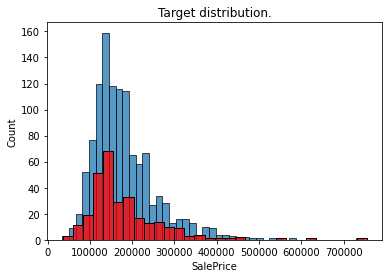

In [51]:
ax = sns.histplot(y_train);
sns.histplot(y_test, ax=ax, color='red')
plt.title('Target distribution.');

In [52]:
input_pipeline = sklearn.pipeline.Pipeline([
    ('std', sklearn.preprocessing.StandardScaler()),
    ('lr', sklearn.linear_model.LinearRegression(fit_intercept=True))
])

target_transformer = sklearn.preprocessing.FunctionTransformer(func=np.log, 
                                                               inverse_func=np.exp)

estimator = sklearn.compose.TransformedTargetRegressor(regressor=input_pipeline, 
                                                       transformer=target_transformer)

In [53]:
cv = sklearn.model_selection.KFold(n_splits=5, 
                                   shuffle=True, 
                                   random_state=42)

In [54]:
cv_scores = sklearn.model_selection.cross_val_score(estimator, 
                                                    X_train,
                                                    y_train,
                                                    cv=cv,                                                    
                                                    scoring='r2',
                                                    n_jobs=-1)

In [55]:
cv_scores

array([ 0.88276142,  0.62057188, -0.64820143,  0.86793259,  0.87008855])

In [57]:
estimator.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('std', StandardScaler()),
                                                     ('lr',
                                                      LinearRegression())]),
                           transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>))

In [58]:
preds = estimator.predict(X_test)

/home/ikacikac/workspace/dvc_studio_test/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


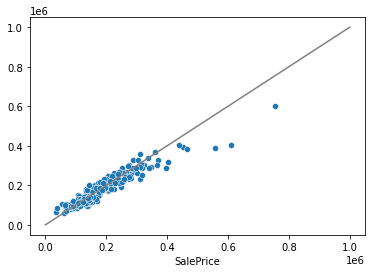

In [68]:
sns.scatterplot(y_test, preds);
plt.plot([0, 1e6], [0, 1e6], color='grey');

In [75]:
metrics = {
    'r2': sklearn.metrics.r2_score(y_test, preds),
    'rmse': np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds)),
    'mae': sklearn.metrics.mean_absolute_error(y_test, preds),
}

In [79]:
metrics

{'r2': 0.8839232527421156,
 'rmse': 29838.674845528698,
 'mae': 19160.879939621736}

In [80]:
with open('metrics.json', 'w') as f:
    f.write(json.dumps(metrics))